In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [ ]:
df=pd.read_csv('/content/ELAVATION_STAT.csv')

In [ ]:
print(df.columns) 
df.head()

Index(['DISCOVERY_DATE', 'DISCOVERY_DOY', 'FIRE_SIZE', 'FIRE_YEAR', 'FOD_ID',
       'STAT_CAUSE_DESCR', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean',
       'lon', 'lat'],
      dtype='object')


,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,FIRE_YEAR,FOD_ID,STAT_CAUSE_DESCR,elev_max,elev_mean,elev_min,slope_mean,lon,lat
0,2013-01-05T00:00:00+00:00,5,4.0,2013,201842250,Miscellaneous,215,193.695950,168,18.022604,-79.071667,38.557778
1,2013-01-08T00:00:00+00:00,8,2.0,2013,201840578,Debris Burning,136,88.597007,57,20.427586,-79.383333,38.300000
2,2013-01-08T00:00:00+00:00,8,2.0,2013,201840580,Debris Burning,434,391.754443,348,17.098140,-79.029444,38.741389
3,2013-01-10T00:00:00+00:00,10,1.5,2013,201840757,Debris Burning,59,36.743932,-2,15.562330,-82.447778,36.854722
4,2013-01-23T00:00:00+00:00,23,0.5,2013,201840781,Equipment Use,680,507.770072,341,20.657843,-80.201944,37.760278


In [ ]:
# Check for Nan values
df.isnull().values.any()
df1 = df[df.isna().any(axis=1)]
print("Num NAN values: {}".format(df1.shape[0]))

Num NAN values: 0


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STAT_CAUSE_CODE'] = le.fit_transform(df.STAT_CAUSE_DESCR.values)
df.head()

,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,FIRE_YEAR,FOD_ID,STAT_CAUSE_DESCR,elev_max,elev_mean,elev_min,slope_mean,lon,lat,STAT_CAUSE_CODE
0,2013-01-05T00:00:00+00:00,5,4.0,2013,201842250,Miscellaneous,215,193.695950,168,18.022604,-79.071667,38.557778,7
1,2013-01-08T00:00:00+00:00,8,2.0,2013,201840578,Debris Burning,136,88.597007,57,20.427586,-79.383333,38.300000,3
2,2013-01-08T00:00:00+00:00,8,2.0,2013,201840580,Debris Burning,434,391.754443,348,17.098140,-79.029444,38.741389,3
3,2013-01-10T00:00:00+00:00,10,1.5,2013,201840757,Debris Burning,59,36.743932,-2,15.562330,-82.447778,36.854722,3
4,2013-01-23T00:00:00+00:00,23,0.5,2013,201840781,Equipment Use,680,507.770072,341,20.657843,-80.201944,37.760278,4


In [ ]:
le.classes_

array(['Arson', 'Campfire', 'Children', 'Debris Burning', 'Equipment Use',
       'Fireworks', 'Lightning', 'Miscellaneous', 'Missing/Undefined',
       'Powerline', 'Railroad', 'Smoking', 'Structure'], dtype=object)

In [ ]:
import datetime as dt
df['MYDATE'] = pd.to_datetime(df['DISCOVERY_DATE'])
df['MYDATE']=df['MYDATE'].map(dt.datetime.toordinal)
df.head(5)

,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,FIRE_YEAR,FOD_ID,STAT_CAUSE_DESCR,elev_max,elev_mean,elev_min,slope_mean,lon,lat,STAT_CAUSE_CODE,Date,MYDATE
0,2013-01-05T00:00:00+00:00,5,4.0,2013,201842250,Miscellaneous,215,193.695950,168,18.022604,-79.071667,38.557778,7,734873,734873
1,2013-01-08T00:00:00+00:00,8,2.0,2013,201840578,Debris Burning,136,88.597007,57,20.427586,-79.383333,38.300000,3,734876,734876
2,2013-01-08T00:00:00+00:00,8,2.0,2013,201840580,Debris Burning,434,391.754443,348,17.098140,-79.029444,38.741389,3,734876,734876
3,2013-01-10T00:00:00+00:00,10,1.5,2013,201840757,Debris Burning,59,36.743932,-2,15.562330,-82.447778,36.854722,3,734878,734878
4,2013-01-23T00:00:00+00:00,23,0.5,2013,201840781,Equipment Use,680,507.770072,341,20.657843,-80.201944,37.760278,4,734891,734891


In [ ]:
#Changing pandas dataframe to numpy array
Y = df['FIRE_SIZE'].values
X = df[['MYDATE', 'DISCOVERY_DOY','FIRE_YEAR', 'FOD_ID', 'STAT_CAUSE_CODE','lat', 'lon']]
print(Y.shape)
print(X.shape)

(21833,)
(21833, 7)


In [ ]:
X.head()

,MYDATE,DISCOVERY_DOY,FIRE_YEAR,FOD_ID,STAT_CAUSE_CODE,lat,lon
0,734873,5,2013,201842250,7,38.557778,-79.071667
1,734876,8,2013,201840578,3,38.300000,-79.383333
2,734876,8,2013,201840580,3,38.741389,-79.029444
3,734878,10,2013,201840757,3,36.854722,-82.447778
4,734891,23,2013,201840781,4,37.760278,-80.201944


In [ ]:
#Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X.shape

(21833, 7)

In [ ]:
# Shuffles the data before split
# Train/Test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.5)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 10916 , #Test: 10917
# inputs: 7


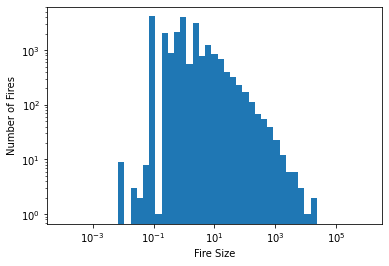

Mean fire size: 15.648139058543215
Median fire size: 1.0
Var in fire size: 46737.15855134302


In [ ]:
#Distibution of fire size
plt.hist(Y, bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("kaggle_fires_dist_log.png")
plt.show()

print("Mean fire size: {}".format(np.mean(Y)))
print("Median fire size: {}".format(np.median(Y)))
print("Var in fire size: {}".format(np.var(Y)))

In [ ]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=n, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, input_dim=n , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae','accuracy'])

In [ ]:
#Save partly trained model
#model.save('partly_trained.h5')

#Load partly trained model
from keras.models import load_model
#model = load_model('partly_trained.h5')

#Continue training
history = model.fit(X_train, y_train, epochs=10, batch_size=640, verbose = 2, validation_split = 0.1, shuffle=True)

Epoch 1/10
16/16 - 2s - loss: 28416.7461 - mse: 28416.7461 - mae: 15.0023 - accuracy: 0.0545 - val_loss: 37451.7266 - val_mse: 37451.7266 - val_mae: 15.2809 - val_accuracy: 0.1841
Epoch 2/10
16/16 - 0s - loss: 28288.7559 - mse: 28288.7559 - mae: 22.7634 - accuracy: 0.1629 - val_loss: 37343.9844 - val_mse: 37343.9844 - val_mae: 19.3593 - val_accuracy: 0.1841
Epoch 3/10
16/16 - 0s - loss: 28256.0137 - mse: 28256.0137 - mae: 18.1512 - accuracy: 0.1629 - val_loss: 37328.7305 - val_mse: 37328.7305 - val_mae: 21.0903 - val_accuracy: 0.1841
Epoch 4/10
16/16 - 0s - loss: 28227.7207 - mse: 28227.7207 - mae: 24.9169 - accuracy: 0.1629 - val_loss: 37328.9297 - val_mse: 37328.9297 - val_mae: 21.2705 - val_accuracy: 0.1841
Epoch 5/10
16/16 - 1s - loss: 28203.9805 - mse: 28203.9805 - mae: 21.6378 - accuracy: 0.1629 - val_loss: 37317.7227 - val_mse: 37317.7227 - val_mae: 23.7940 - val_accuracy: 0.1841
Epoch 6/10
16/16 - 1s - loss: 28195.2090 - mse: 28195.2090 - mae: 24.2246 - accuracy: 0.1629 - val_l

In [ ]:
model.metrics_names

['loss', 'mse', 'mae', 'accuracy']

In [ ]:
#Save partly trained model
model.save('partly_trained.h5')

#Load partly trained model
from keras.models import load_model
model = load_model('partly_trained.h5')

loss, mse, mae, accuracy = model.evaluate(X_test, y_test)
print('MSE: %.2f, MAE: %.2f' % (mse,mae))

342/342 [==============================] - 1s 2ms/step - loss: 64349.0938 - mse: 64349.0938 - mae: 22.1089 - accuracy: 0.1750
MSE: 64349.09, MAE: 22.11


342/342 [==============================] - 1s 1ms/step


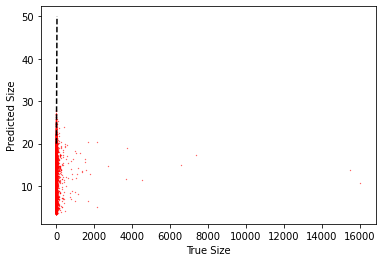

In [ ]:
#Visualize some predictions
preds = model.predict(X_test, verbose=1)
plt.scatter(y_test, preds, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.plot([20,50],[20,50],c='k',linestyle='--')
plt.show()

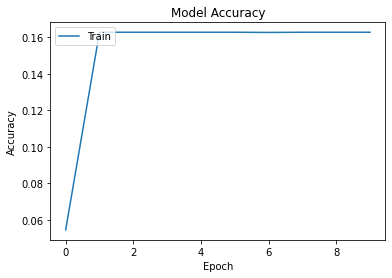

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

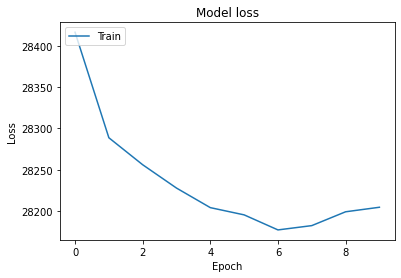

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# SVM
from sklearn import svm
from sklearn.metrics import r2_score, mean_absolute_error

n = 70000
svm_reg = svm.SVR(kernel='rbf', degree=3, gamma='auto')
svm_reg.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = svm_reg.predict(X_test[0:n,:])

def mean_absolute_percentage_error(y_test, y_pred): 
    return np.mean(np.abs((y_test - y_pred) / (y_test+10e-1)) ) * 100
print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("MAPE: {}".format(mean_absolute_percentage_error(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 15.869906866211542
MAPE: 51.50262670989514
---------------------------------------


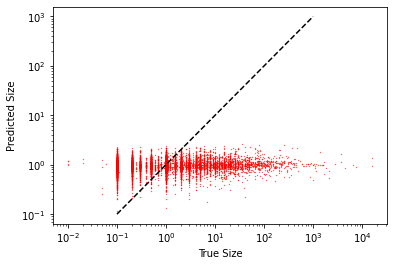

In [ ]:
#Visualize svm predictions
plt.scatter(y_test[0:n], y_pred, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("kaggle_fires_svm_preds.png")
plt.show()

In [ ]:
# SKlearn MLP
from sklearn.neural_network import MLPRegressor

n = 10000

NN = MLPRegressor(hidden_layer_sizes=(800,800,800,800),max_iter=200 )

NN.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
y_pred = NN.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")

MAE: 23.66807365576672
r2: -0.040630938388881654
---------------------------------------


In [ ]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

n = 10000

for nbs in [3,5,10]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts,
                                   n_jobs=6)

        K_nn.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
        y_pred = K_nn.predict(X_test[0:n,:])

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
        print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
        print("---------------------------------------")


nbs: 3, wts: distance
MAE: 26.79403539638089
r2: -0.11286511759145146
---------------------------------------
nbs: 3, wts: uniform
MAE: 26.121014007261863
r2: -0.0740030588809828
---------------------------------------
nbs: 5, wts: distance
MAE: 26.59405144385451
r2: -0.0777910516245306
---------------------------------------
nbs: 5, wts: uniform
MAE: 26.206600606679864
r2: -0.04864539276227253
---------------------------------------
nbs: 10, wts: distance
MAE: 26.203447663198126
r2: -0.05039113434217679
---------------------------------------
nbs: 10, wts: uniform
MAE: 25.59666210511837
r2: -0.023183300178630573
---------------------------------------


In [ ]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = tree_clf.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 31.430759002568898
r2: -0.9981753330755487
---------------------------------------


In [ ]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 10000

estimators = [K_nn, NN, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                             meta_regressor=NN)

regStack.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = regStack.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 28.66661728117309
r2: -0.13212161015851032
---------------------------------------


In [ ]:
#Best Features - Univariate statistical selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

feature_names = ['MYDATE', 'DISCOVERY_DOY','FIRE_YEAR', 'FOD_ID', 'STAT_CAUSE_CODE','lat', 'lon']

bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,np.array(Y).astype(int))
dfscores = pd.DataFrame(fit.scores_)
df_specs = pd.Series(feature_names).astype(str)
featureScores = pd.concat([df_specs,dfscores],axis=1)
featureScores.columns = ['Feature','f_classif Score'] 
print(featureScores.nlargest(len(feature_names),'f_classif Score'))  

           Feature  f_classif Score
3           FOD_ID         1.633780
2        FIRE_YEAR         1.378482
0           MYDATE         1.354870
4  STAT_CAUSE_CODE         1.268075
1    DISCOVERY_DOY         1.131915
6              lon         1.092921
5              lat         0.867531


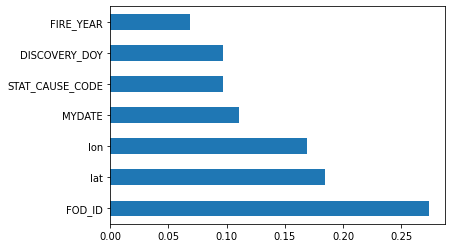

In [ ]:
#Best Features - importance
# Feature importance gives you a score for each feature of your data, the higher the score more 
# important or relevant is the feature towards your output variable.
# Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using 
# Extra Tree Classifier for extracting the top 10 features for the dataset.

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
model.feature_importances_

array([0.11033689, 0.0967231 , 0.06852915, 0.27371735, 0.09677438,
       0.18484073, 0.1690784 ])

Index(['DISCOVERY_DATE', 'DISCOVERY_DOY', 'FIRE_SIZE', 'FIRE_YEAR', 'FOD_ID',
       'STAT_CAUSE_DESCR', 'elev_max', 'elev_mean', 'elev_min', 'slope_mean',
       'lon', 'lat', 'STAT_CAUSE_CODE', 'Date', 'MYDATE'],
      dtype='object')


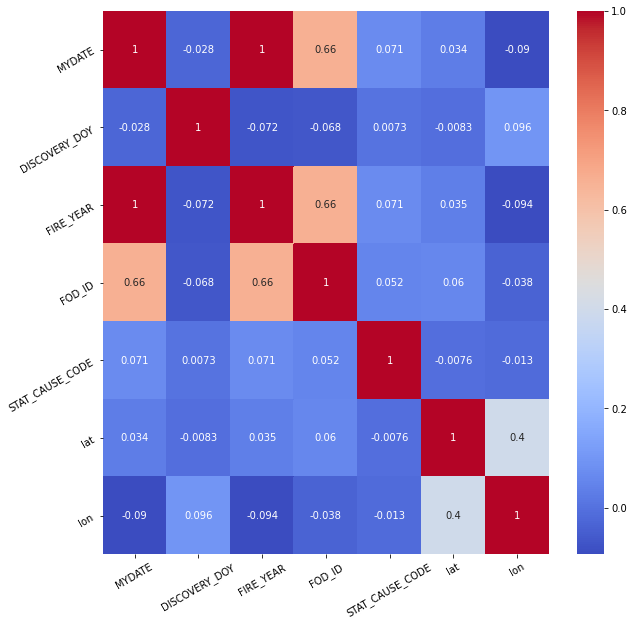

In [ ]:
# Best feautres - correlation heatmap
print(df.columns) 
import seaborn as sns
feature_names = ['MYDATE', 'DISCOVERY_DOY','FIRE_YEAR', 'FOD_ID', 'STAT_CAUSE_CODE','lat', 'lon']

data =df[feature_names]
corrmat = np.corrcoef(data.T)
plt.figure(figsize=(10,10))
g=sns.heatmap(corrmat,annot=True,cmap="coolwarm")
g.set_xticklabels(feature_names,rotation=30)
g.set_yticklabels(feature_names,rotation=30)
plt.show()